In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

x_train = tf.reshape(x_train, (-1, 3072))
x_test  = tf.reshape(x_test, (-1, 3072))

# data normalization
x_train = x_train/255.0
x_test  = x_test/255.0

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000, 1)
(10000, 1)


In [2]:
# set seed
tf.random.set_seed(1234)

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(3072,)))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [3]:
# optimizer and loss
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(x_train, y_train, batch_size=256,
                    validation_data=(x_test, y_test),
                    epochs=150, verbose=2)

Epoch 1/150
196/196 - 4s - loss: 1.9281 - sparse_categorical_accuracy: 0.3080 - val_loss: 1.7597 - val_sparse_categorical_accuracy: 0.3767 - 4s/epoch - 22ms/step
Epoch 2/150
196/196 - 3s - loss: 1.7201 - sparse_categorical_accuracy: 0.3872 - val_loss: 1.6699 - val_sparse_categorical_accuracy: 0.4127 - 3s/epoch - 17ms/step
Epoch 3/150
196/196 - 3s - loss: 1.6298 - sparse_categorical_accuracy: 0.4209 - val_loss: 1.5754 - val_sparse_categorical_accuracy: 0.4304 - 3s/epoch - 17ms/step
Epoch 4/150
196/196 - 3s - loss: 1.5622 - sparse_categorical_accuracy: 0.4460 - val_loss: 1.6079 - val_sparse_categorical_accuracy: 0.4240 - 3s/epoch - 17ms/step
Epoch 5/150
196/196 - 3s - loss: 1.5174 - sparse_categorical_accuracy: 0.4610 - val_loss: 1.5672 - val_sparse_categorical_accuracy: 0.4461 - 3s/epoch - 16ms/step
Epoch 6/150
196/196 - 2s - loss: 1.4839 - sparse_categorical_accuracy: 0.4718 - val_loss: 1.4957 - val_sparse_categorical_accuracy: 0.4677 - 2s/epoch - 12ms/step
Epoch 7/150
196/196 - 3s - l

Epoch 52/150
196/196 - 3s - loss: 0.9070 - sparse_categorical_accuracy: 0.6784 - val_loss: 1.5475 - val_sparse_categorical_accuracy: 0.5098 - 3s/epoch - 17ms/step
Epoch 53/150
196/196 - 3s - loss: 0.8961 - sparse_categorical_accuracy: 0.6808 - val_loss: 1.4592 - val_sparse_categorical_accuracy: 0.5184 - 3s/epoch - 16ms/step
Epoch 54/150
196/196 - 3s - loss: 0.8848 - sparse_categorical_accuracy: 0.6857 - val_loss: 1.5078 - val_sparse_categorical_accuracy: 0.5212 - 3s/epoch - 17ms/step
Epoch 55/150
196/196 - 3s - loss: 0.8702 - sparse_categorical_accuracy: 0.6908 - val_loss: 1.5070 - val_sparse_categorical_accuracy: 0.5114 - 3s/epoch - 16ms/step
Epoch 56/150
196/196 - 3s - loss: 0.8701 - sparse_categorical_accuracy: 0.6877 - val_loss: 1.5393 - val_sparse_categorical_accuracy: 0.5119 - 3s/epoch - 17ms/step
Epoch 57/150
196/196 - 3s - loss: 0.8643 - sparse_categorical_accuracy: 0.6923 - val_loss: 1.5352 - val_sparse_categorical_accuracy: 0.5148 - 3s/epoch - 16ms/step
Epoch 58/150
196/196 -

Epoch 103/150
196/196 - 3s - loss: 0.6522 - sparse_categorical_accuracy: 0.7662 - val_loss: 1.9049 - val_sparse_categorical_accuracy: 0.5026 - 3s/epoch - 17ms/step
Epoch 104/150
196/196 - 3s - loss: 0.6544 - sparse_categorical_accuracy: 0.7666 - val_loss: 1.9319 - val_sparse_categorical_accuracy: 0.4998 - 3s/epoch - 17ms/step
Epoch 105/150
196/196 - 3s - loss: 0.6459 - sparse_categorical_accuracy: 0.7689 - val_loss: 1.9161 - val_sparse_categorical_accuracy: 0.5007 - 3s/epoch - 17ms/step
Epoch 106/150
196/196 - 3s - loss: 0.6258 - sparse_categorical_accuracy: 0.7759 - val_loss: 1.9325 - val_sparse_categorical_accuracy: 0.5044 - 3s/epoch - 17ms/step
Epoch 107/150
196/196 - 3s - loss: 0.6328 - sparse_categorical_accuracy: 0.7770 - val_loss: 1.9217 - val_sparse_categorical_accuracy: 0.5085 - 3s/epoch - 17ms/step
Epoch 108/150
196/196 - 3s - loss: 0.6285 - sparse_categorical_accuracy: 0.7759 - val_loss: 1.9420 - val_sparse_categorical_accuracy: 0.5022 - 3s/epoch - 17ms/step
Epoch 109/150
19

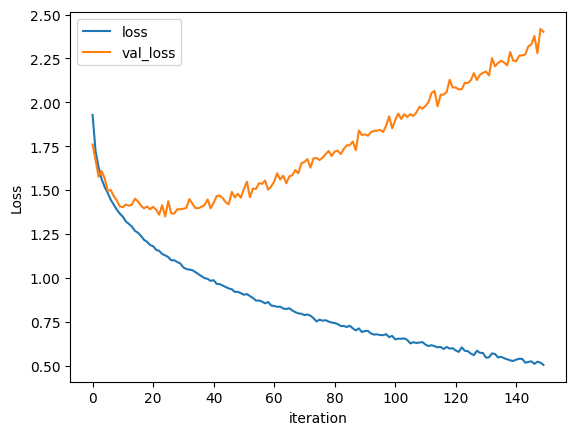

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

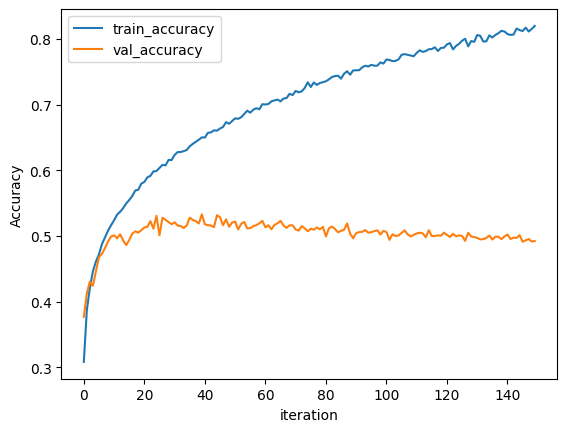

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [6]:
import matplotlib.pyplot as plt
%matplotlib qt

plt.plot(history.history['sparse_categorical_accuracy'], label='train_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()